In [4]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

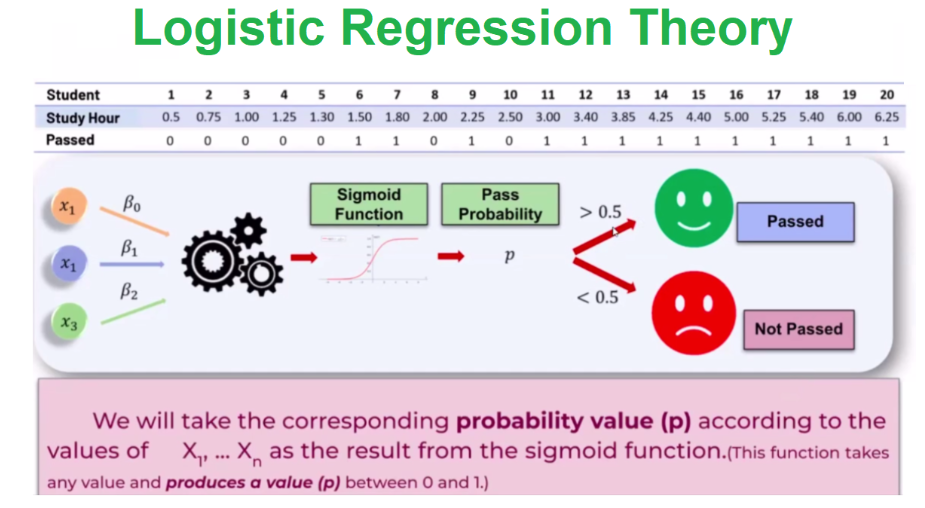

In [6]:
df = pd.read_csv("hearing_test.csv")
df.head()

,age,physical_score,test_result
0,33.000,40.700,1
1,50.000,37.200,1
2,52.000,24.700,0
3,56.000,31.000,0
4,35.000,42.900,1


1'ler testi geçenler,  0'lar geçemeyenler. 1=True, 0=False mantığı
> bizim skorlarımız default olarak 1 üzerinde çalışıyor


## Exploratary Data Analysis and Visualization

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,5000.000,51.609,11.287,18.000,43.000,51.000,60.000,90.000
physical_score,5000.000,32.760,8.170,-0.000,26.700,35.300,38.900,50.000
test_result,5000.000,0.600,0.490,0.000,0.000,1.000,1.000,1.000


In [9]:
df.test_result.value_counts()

1    3000
0    2000
Name: test_result, dtype: int64

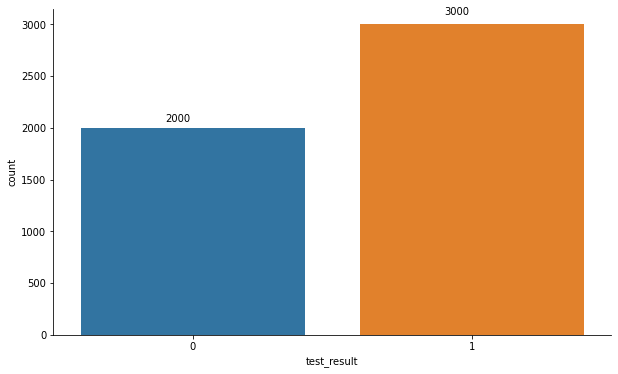

In [10]:
ax = sns.countplot(df['test_result'])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + 0.3, p.get_height() * 1.03));

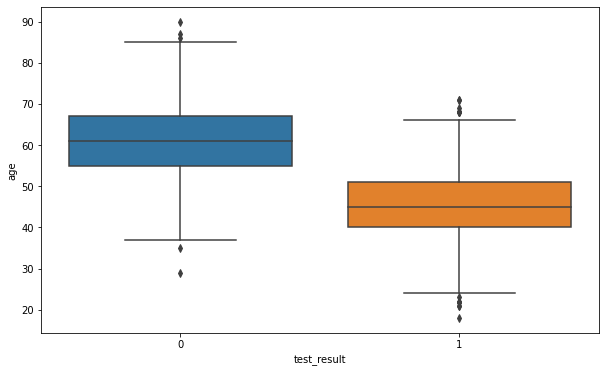

In [11]:
sns.boxplot(x='test_result',y='age',data=df);

test_result'ı 0 olanlar testi geçememiş, 1 olanlar testi geçmiş

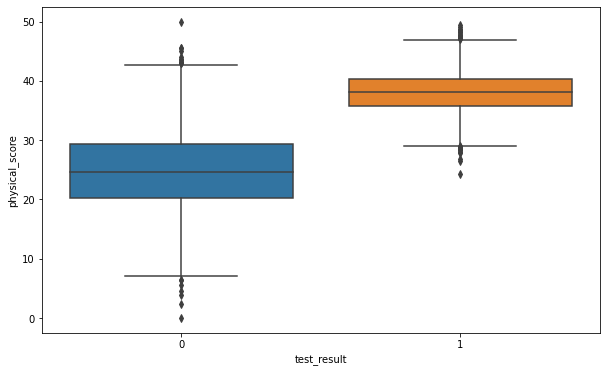

In [12]:
sns.boxplot(x='test_result',y='physical_score',data=df);

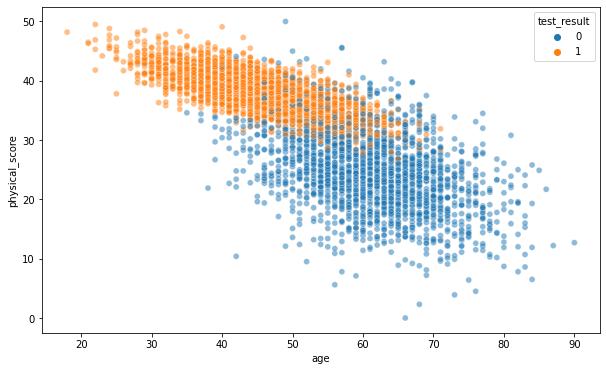

In [13]:
sns.scatterplot(x="age", y="physical_score", data=df, hue="test_result",
                alpha=0.5);

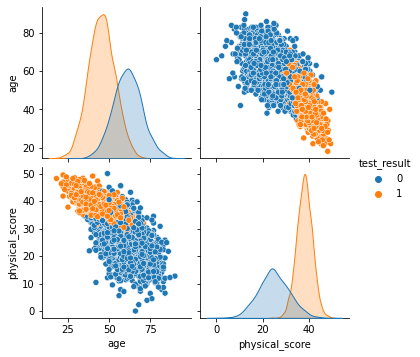

In [14]:
sns.pairplot(df, hue="test_result");

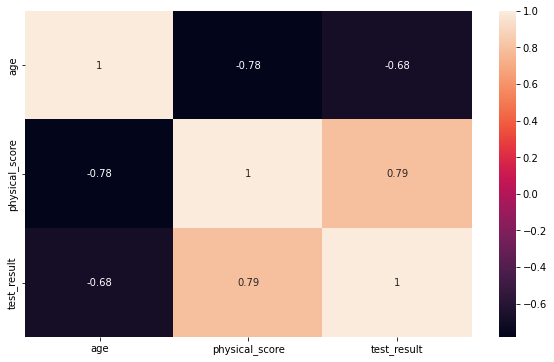

In [15]:
sns.heatmap(df.corr(), annot=True);

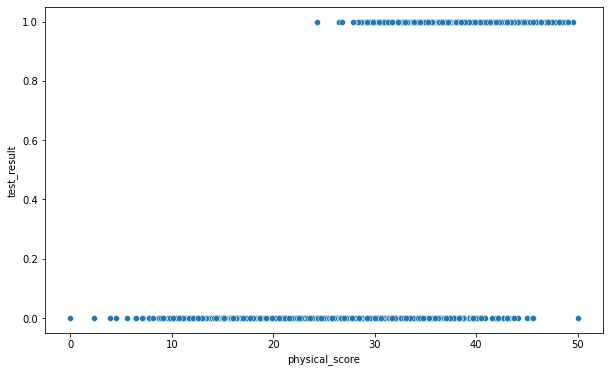

In [16]:
sns.scatterplot(x="physical_score", y="test_result", data=df);

## Train | Test Split and Scaling

In [17]:
X = df.drop("test_result", axis=1)
y = df["test_result"]

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [20]:
scaler = StandardScaler()

In [21]:
X_train_scaled = scaler.fit_transform(X_train)  # scaler.fit işlemi sadece X_train e uygulanır
X_test_scaled = scaler.transform(X_test)

## Modelling

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [22]:
from sklearn.linear_model import LogisticRegression

In [24]:
log_model = LogisticRegression()

In [25]:
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [26]:
log_model.coef_

array([[-0.94953524,  3.45991194]])

featureların katsayıları yukarıdaki katsayılar. Physical_Score'un, test_score üzerinde pozitif yönlü olarak daha kuvvetli bir etkisi varken, age'in negatif yönlü daha zayıf bir etkisi olduğunu gösteriyor

In [27]:
log_model.intercept_

array([0.48867341])

In [28]:
y_pred = log_model.predict(X_test_scaled)
y_pred

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,

yukarıda test setindeki değerlerimiz döndü

In [29]:
y_pred_proba = log_model.predict_proba(X_test_scaled)
y_pred_proba

array([[2.38434328e-02, 9.76156567e-01],
       [2.69240761e-02, 9.73075924e-01],
       [9.89194168e-01, 1.08058325e-02],
       [1.90768955e-03, 9.98092310e-01],
       [9.75012619e-01, 2.49873806e-02],
       [9.89652504e-01, 1.03474957e-02],
       [7.40226674e-02, 9.25977333e-01],
       [1.70943342e-02, 9.82905666e-01],
       [9.97066033e-01, 2.93396692e-03],
       [3.30521615e-02, 9.66947839e-01],
       [8.31035903e-02, 9.16896410e-01],
       [9.92865306e-03, 9.90071347e-01],
       [7.08965218e-03, 9.92910348e-01],
       [9.34236379e-01, 6.57636209e-02],
       [1.16594927e-04, 9.99883405e-01],
       [6.58904151e-02, 9.34109585e-01],
       [9.89126706e-01, 1.08732938e-02],
       [2.80051357e-03, 9.97199486e-01],
       [5.58920624e-04, 9.99441079e-01],
       [9.96523291e-01, 3.47670946e-03],
       [8.81757060e-01, 1.18242940e-01],
       [1.31030473e-01, 8.68969527e-01],
       [5.45646751e-01, 4.54353249e-01],
       [3.44064171e-02, 9.65593583e-01],
       [3.983864

In [30]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data

,age,physical_score,test_result
1718,39.000,37.800,1
2511,45.000,38.700,1
345,56.000,21.800,0
2521,40.000,44.000,1
54,64.000,25.400,0
...,...,...,...
4770,46.000,37.700,1
188,59.000,36.500,1
3335,54.000,22.800,0
4583,58.000,20.500,0


In [31]:
test_data["pred_proba"] = y_pred_proba[:, 1]
test_data

,age,physical_score,test_result,pred_proba
1718,39.000,37.800,1,0.976
2511,45.000,38.700,1,0.973
345,56.000,21.800,0,0.011
2521,40.000,44.000,1,0.998
54,64.000,25.400,0,0.025
...,...,...,...,...
4770,46.000,37.700,1,0.956
188,59.000,36.500,1,0.813
3335,54.000,22.800,0,0.019
4583,58.000,20.500,0,0.005


In [32]:
test_data["pred"] = y_pred
test_data

,age,physical_score,test_result,pred_proba,pred
1718,39.000,37.800,1,0.976,1
2511,45.000,38.700,1,0.973,1
345,56.000,21.800,0,0.011,0
2521,40.000,44.000,1,0.998,1
54,64.000,25.400,0,0.025,0
...,...,...,...,...,...
4770,46.000,37.700,1,0.956,1
188,59.000,36.500,1,0.813,1
3335,54.000,22.800,0,0.019,0
4583,58.000,20.500,0,0.005,0


In [33]:
test_data.sample(10)

,age,physical_score,test_result,pred_proba,pred
3007,34.000,42.500,1,0.998,1
645,82.000,12.000,0,0.000,0
3035,36.000,41.600,1,0.996,1
3835,77.000,12.100,0,0.000,0
4963,76.000,33.100,0,0.196,0
2808,28.000,44.300,1,0.999,1
1715,40.000,43.300,1,0.997,1
2785,39.000,42.100,1,0.996,1
42,42.000,39.300,1,0.984,1
2777,52.000,27.600,0,0.152,0


## Model Performance on Classification Tasks

In [34]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score


In [35]:
accuracy_score(y_test, y_pred)

0.93

In [37]:
log_model.score(X_test_scaled, y_test)  # accuracy score ile aynı - her zaman aynı sonucu verir manasında

0.93

In [38]:
precision_score(y_test, y_pred)

0.9331210191082803

In [39]:
recall_score(y_test, y_pred)

0.9543973941368078

In [40]:
f1_score(y_test, y_pred)

0.9436392914653785

In [41]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [42]:
confusion_matrix(y_test,y_pred)

array([[172,  21],
       [ 14, 293]])

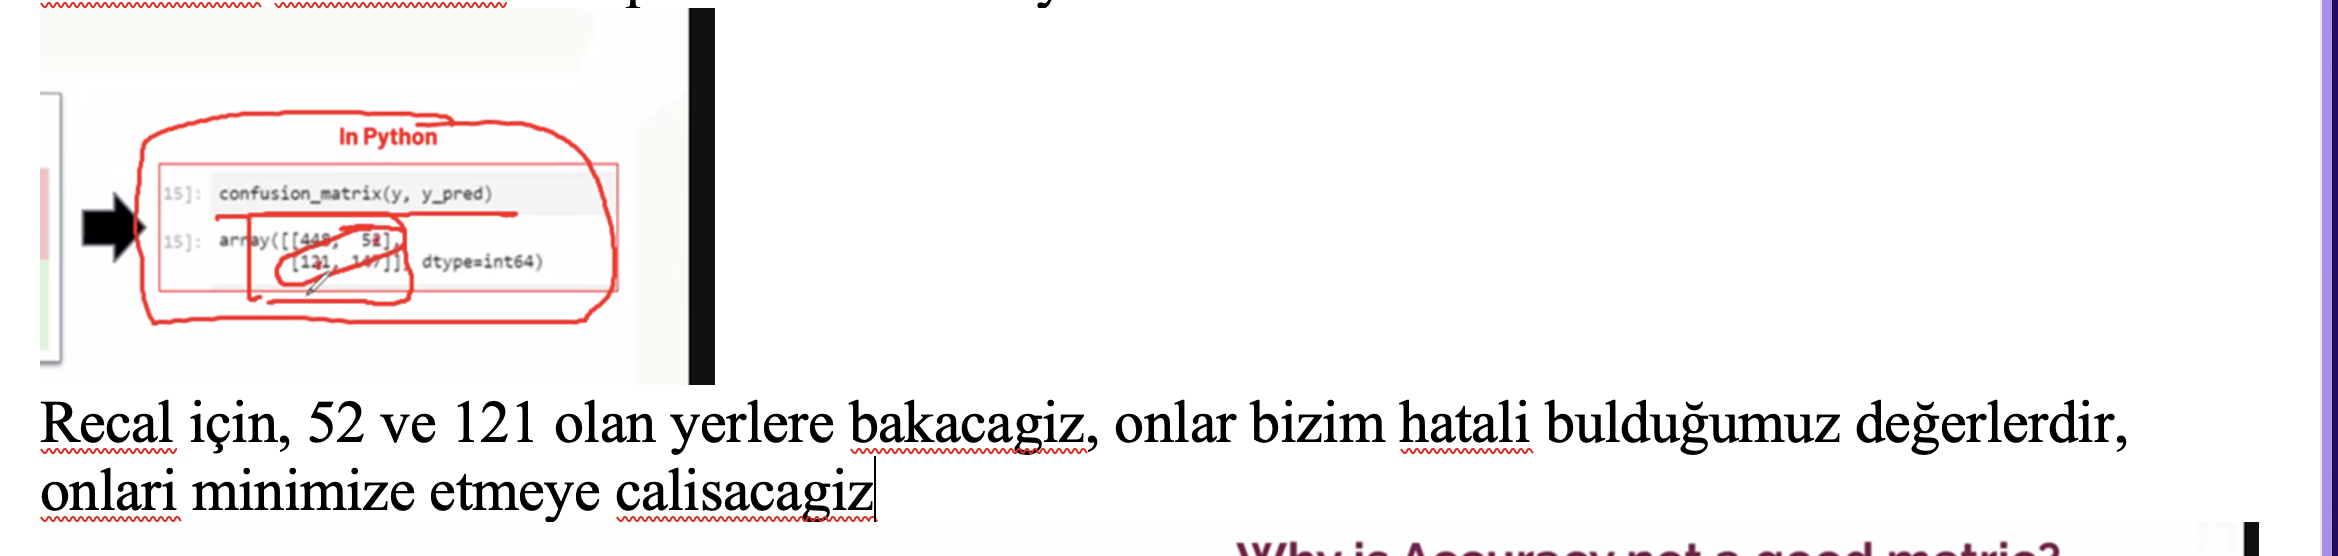

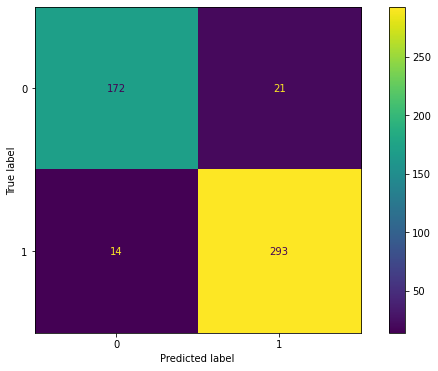

In [44]:
plot_confusion_matrix(log_model, X_test_scaled, y_test);

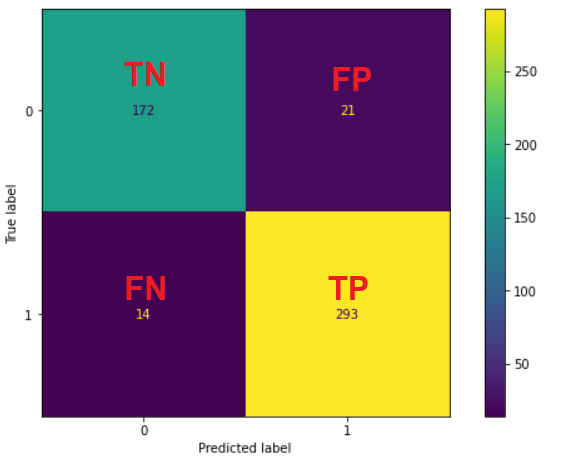

yukarıdaki True Negative - False Positive vs muhabbeti; 0-0 ya da 1-1 ise yukarıdaki Matris True diyoruz. 1-0 ya da 0-1 kesişimi False oluyor. 1-1 olan Positive, 0-0 olan Negative oluyor haliyle. Predicted Label'ın 0 ya da 1 olmasına göre Negative / Positive durumunu ona göre yazıyoruz

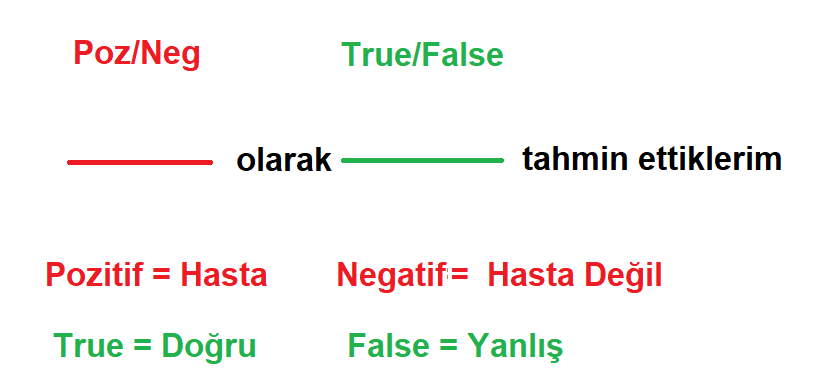

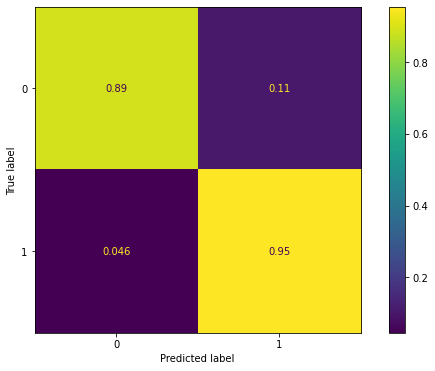

In [45]:
plot_confusion_matrix(log_model, X_test_scaled, y_test, normalize='true');

normalize=True parametresi heatmap deki annot=True gibi bu matriste bize oran veriyor

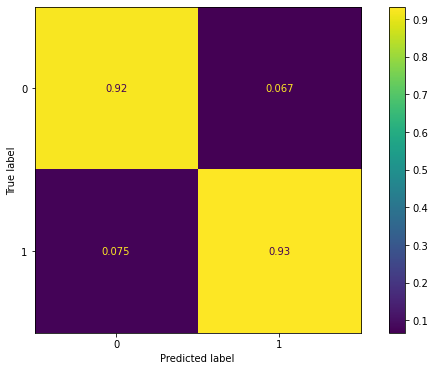

In [46]:
plot_confusion_matrix(log_model, X_test_scaled, y_test, normalize='pred');

yukarıdaki normalize="pred" bize prediction oranlarını veriyor

**Hatırlatma:** *Logistic Regression categoric verilerde; Linear Regression continious verilerde kullanılır*

In [47]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500



yukarıdaki kod da özet tabloyu çıkartıyor.
* support total_num / count gibi
* accuracy - doğru bildiklerimin tüm dataya oranı
* recall - gerçek değerlerin kaçını doğru bildim
* precision - tahmin edilenleren kaç tanesi doğru


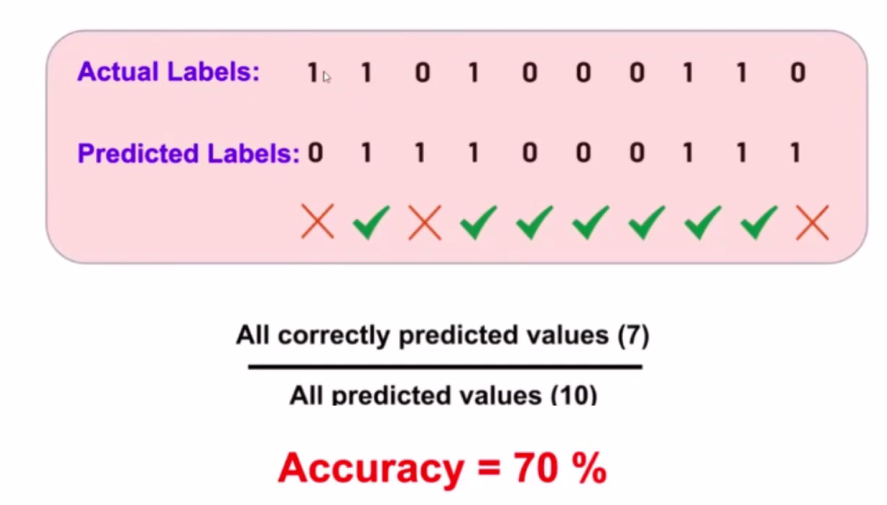

# RECALL

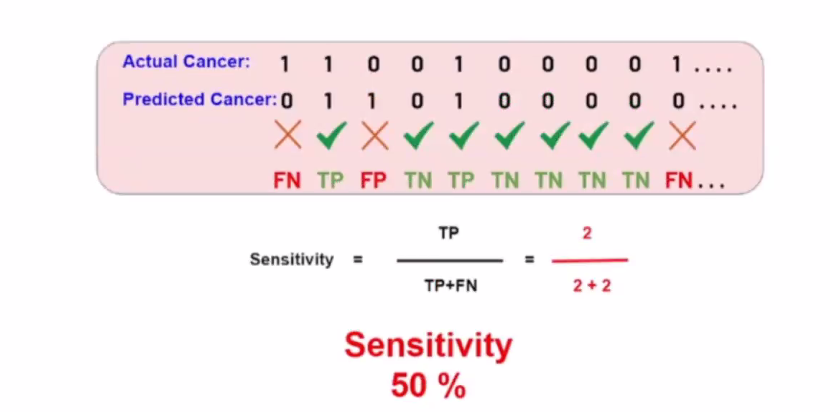

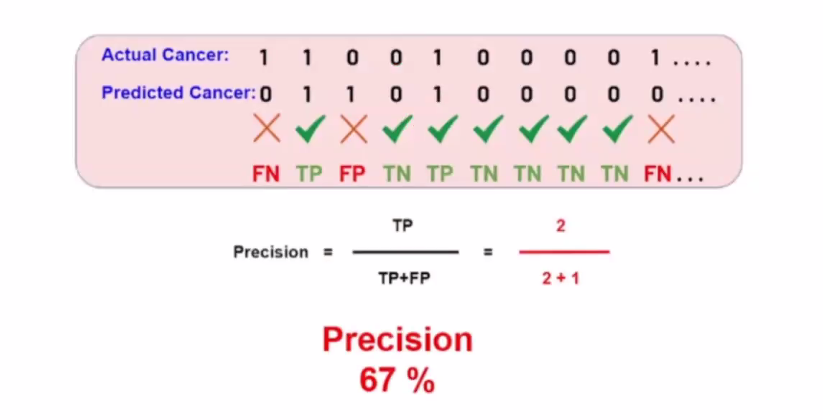

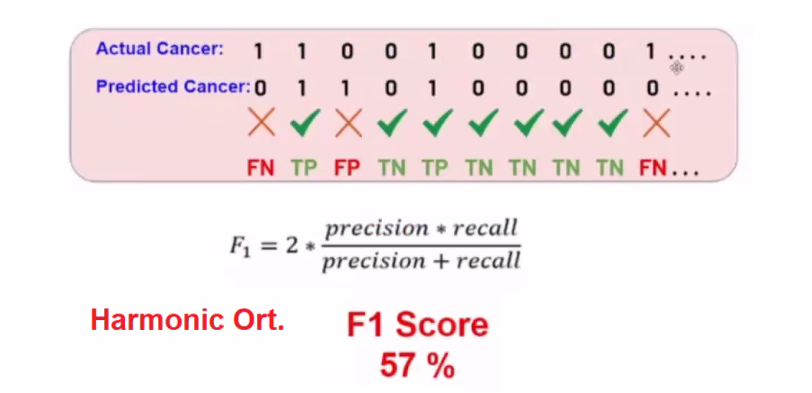

### F1'in basit bir ortalama yerine harmonik ortalama olmasının sebebi ise uç durumları da gözardı etmememiz gerektiğidir. 

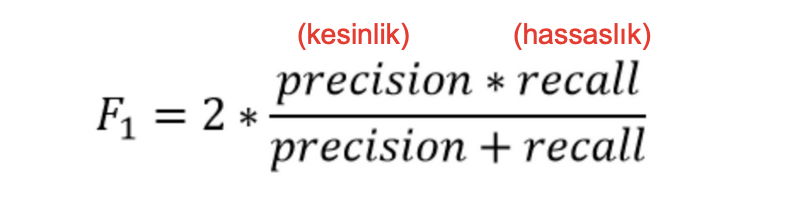

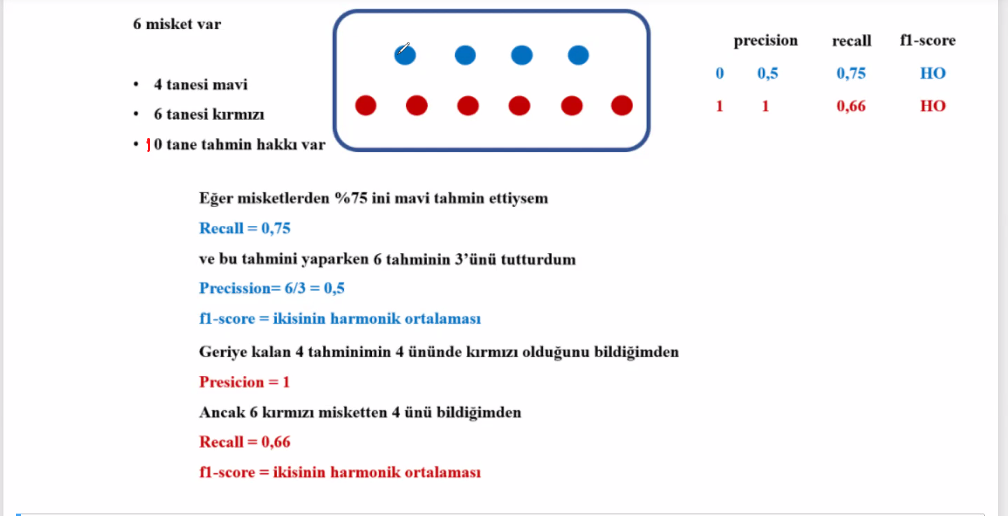

In [48]:
y_train_pred = log_model.predict(X_train_scaled)
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89      1807
           1       0.91      0.95      0.93      2693

    accuracy                           0.91      4500
   macro avg       0.91      0.91      0.91      4500
weighted avg       0.91      0.91      0.91      4500



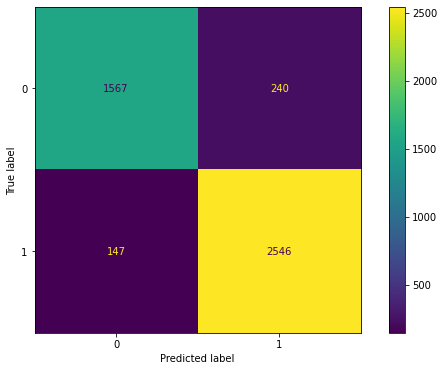

In [49]:
plot_confusion_matrix(log_model, X_train_scaled, y_train);

* precision düşük recall yüksekse model hatalı
* precision yüksek recall düşükse model düşük tahmin yapıyor
* dolayısıyla ikisi arasında bir uyumun olması gerekiyor.!!!

## Cross Validate


In [50]:
from sklearn.model_selection import cross_validate


In [51]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [52]:
model = LogisticRegression()
scores = cross_validate(model, X_train_scaled, y_train, scoring = ['accuracy', 'precision','recall','f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
1,0.072,0.016,0.900,0.889,0.952,0.919
2,0.053,0.022,0.924,0.921,0.956,0.938
3,0.064,0.020,0.936,0.917,0.981,0.948
4,0.020,0.008,0.931,0.938,0.948,0.943
5,0.018,0.008,0.938,0.941,0.955,0.948
6,0.021,0.011,0.902,0.934,0.900,0.917
7,0.019,0.009,0.898,0.889,0.948,0.917
8,0.020,0.008,0.911,0.896,0.963,0.928
9,0.019,0.008,0.891,0.910,0.907,0.909
10,0.018,0.008,0.916,0.911,0.952,0.931


In [53]:
print("Test Set")
print(classification_report(y_test,y_pred))
print("Train Set\n")
y_train_pred = log_model.predict(X_train_scaled)
print(classification_report(y_train,y_train_pred))

Test Set
              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500

Train Set

              precision    recall  f1-score   support

           0       0.91      0.87      0.89      1807
           1       0.91      0.95      0.93      2693

    accuracy                           0.91      4500
   macro avg       0.91      0.91      0.91      4500
weighted avg       0.91      0.91      0.91      4500



 ## ROC (Receiver Operating Curve) and AUC (Area Under Curve)

ROC, ABD'nin uçaklarınn düşman uçağı mı yoksa kendi uçakları mı old nu anlamak için ürettikleri bir sistem aslında, adı oradan geliyor. Japonya ile savaştıkları dönemde yapmışlar bunu

* **ROC :** *işlem karakteristik eğrisi*
* **AUC :** *eğri altında kalan alan*

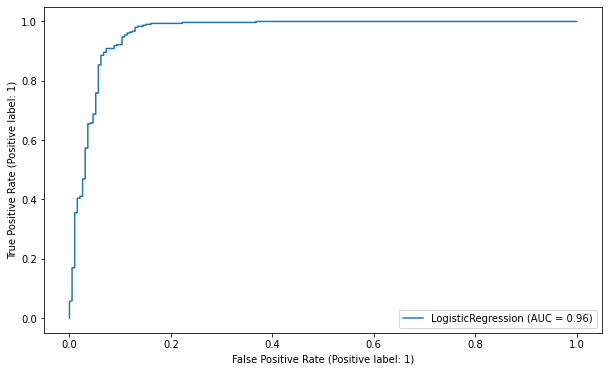

In [54]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve

plot_roc_curve(log_model, X_test_scaled, y_test);

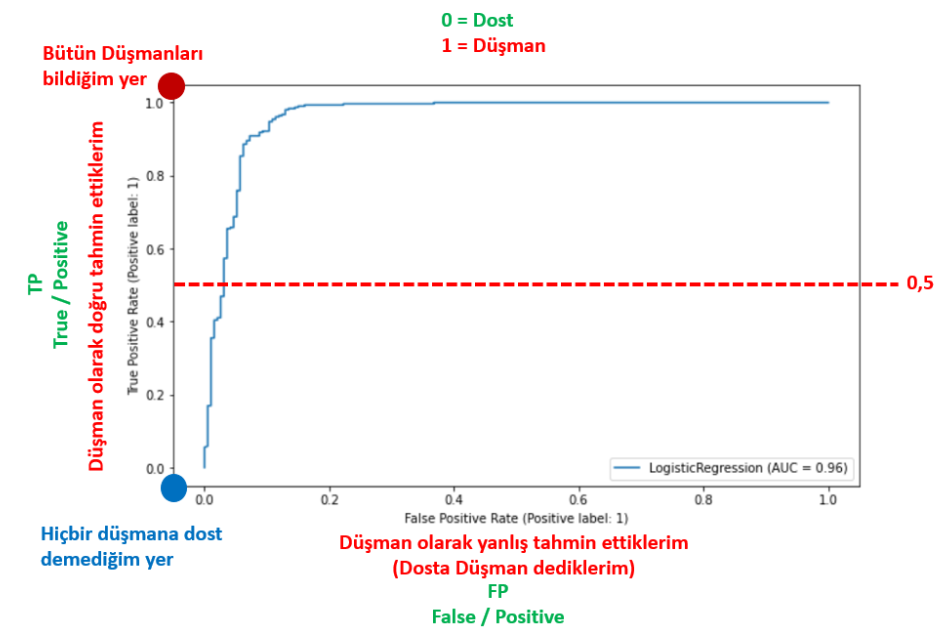

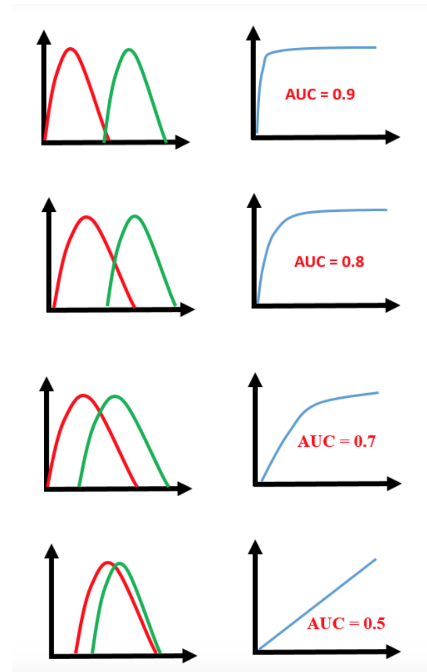

In [55]:
roc_auc_score(y_test, y_pred_proba[:,1])

0.9630132824762451

In [58]:
roc_auc_score(y_test, y_pred)  # yukarıdaki yerine bu yazıldığında hatalı  işlem yapmış olursun !!!

0.9227945519906837

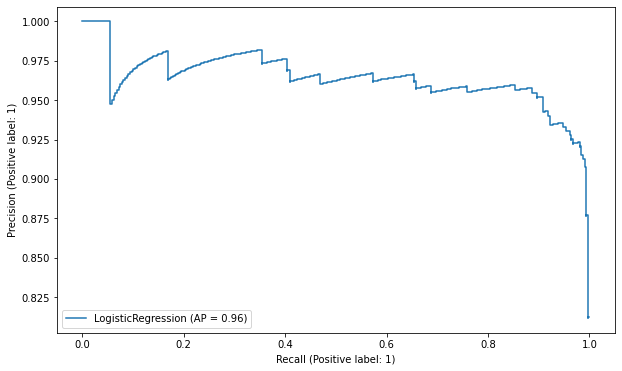

In [59]:
plot_precision_recall_curve(log_model, X_test_scaled, y_test);

## Final Model and Model Deployment

In [60]:
scaler = StandardScaler().fit(X)

In [61]:
import pickle

In [62]:
pickle.dump(scaler, open("scaler_hearing", "wb"))

wb for Write Binary

In [63]:
X_scaled = scaler.transform(X)

In [64]:
final_model = LogisticRegression().fit(X_scaled, y)

In [65]:
pickle.dump(final_model, open("final_model_hearing", "wb"))

In [66]:
my_dict = {"age": [20, 30, 40, 50, 60],
           "physical_score": [50, 30, 20, 10, 5]}

In [67]:
sample = pd.DataFrame(my_dict) # modele test etmek için dict içinde df oluşurulur.
sample

,age,physical_score
0,20,50
1,30,30
2,40,20
3,50,10
4,60,5


* Pickle dump ile yaptığım işlem:
> modeli paketleyip ambalaj yapıp kenara alıyorum ki modlei deploy ederken (yani bir web sayfasında bir arayüğzle çağırırken) kolayca geri çağırabilelim...

* wb yazmasam da kaydeder, ama wb yazınca daha az yer kaplıyor binary olarak

* pickle.dump() ile kaydediyoruz
* pickle.load() ile notebook'umuza yüklüyoruz

In [68]:
scaler_hearing = pickle.load(open("scaler_hearing", "rb"))

In [69]:
sample_scaled = scaler_hearing.transform(sample)
sample_scaled

array([[-2.80075819,  2.11038956],
       [-1.91469467, -0.33789511],
       [-1.02863115, -1.56203745],
       [-0.14256762, -2.78617979],
       [ 0.7434959 , -3.39825096]])

In [70]:
predictions = final_model.predict(sample_scaled) # final modele predict için scale edilen sample verilir
predictions_proba = final_model.predict_proba(sample_scaled) # samplenin proba değerlerini alırız

In [71]:
sample["pred"] = predictions
sample["pred_proba"] = predictions_proba[:, 1]
sample

,age,physical_score,pred,pred_proba
0,20,50,1,1.000
1,30,30,1,0.730
2,40,20,0,0.016
3,50,10,0,0.000
4,60,5,0,0.000
